<a href="https://colab.research.google.com/github/jhj030722/til/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_week5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8-2 문제풀이

8-1 합성곱 층의 필터가 입력 위를 이동하는 간격을 조정하는 Conv2D 클래스의 매개변수는 ?

-> 답: Strides

8-2 Conv2D 클래스의 padding 매개변수의 설명이 올바르게 된 것은?

1) valid는 입력의 크기가 커널의 크기의 배수가 되도록 함 (x)
2) valid는 입력과 출력의 가로세로 크기를 동일하게 만들도록 패딩함 (x)
3) same은 입력의 크기가 커널의 크기의 배수가 되도록 패딩함 (x)
4) same은 입력과 출력의 가로세로 크기를 동일하게 만들도록 패딩함 (o)

-> valid는 **패딩을 하지 않는 것**을 의미하고 same은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가하는 것


8-3 다음 중 최대 풀링 층의 풀링 매개변수를 잘못 설정한 것은?


-> `MaxPooling2D(pool_size, strides, padding)` 구조인데

pool_size는 가로세로 크기가 같은 경우 정수 1개로, 다른 경우는 정수의 튜플(height, width) 로 지정할 수 있다. 일반적으로 풀링의 가로세로 크기는 같게 지정한다.

❌ MaxPooling2D는 2D 전용이므로 3차원 튜플인 (2, 2, 2)는 잘못됨


# 8-3 합성곱 신경망의 시각화

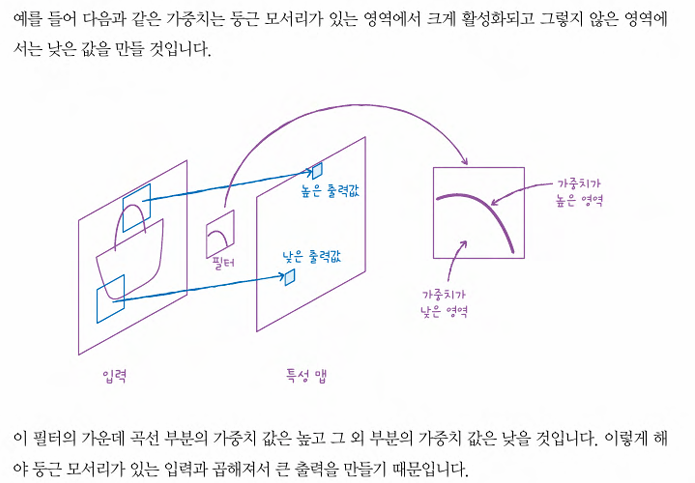

In [4]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [6]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-05-06 16:22:45--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-05-06 16:22:46--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras.1’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.08s   

2025-05-06 16:22:46 (48.0 MB/s) - ‘best-cnn-model.keras.1’ saved [4038273/4038273]



In [7]:
model = keras.models.load_model('best-cnn-model.keras')

In [8]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [9]:
# 첫번째 합성곱 층의 가중치 조사
conv = model.layers[0] # 층의 가중치와 절편은 weight 속성에 저장되어있음
print(conv.weights[0].shape, conv.weights[1].shape) # 첫번째 원소(가중치)와 두번째 원소(쩔편)의 크기 출력

(3, 3, 1, 32) (32,)


커널 크기가 이전에 (3,3)으로 지정했었고
이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널크기가 (3,3,1)

필터 개수가 32개이므로 weights의 가중치의 크기는 (3,3,1,32)

절편의 개수(두번째원소)에서 절편의 개수는 필터마다 1개의 절편이 있으므로 (32,)가 됨

In [10]:
conv_weights = conv.weights[0].numpy() # 넘파이 배열로 변환

print(conv_weights.mean(), conv_weights.std()) # 가중치 배열의 평균과 표준편차를 계산

-0.014383553 0.23351653


In [11]:
import matplotlib.pyplot as plt

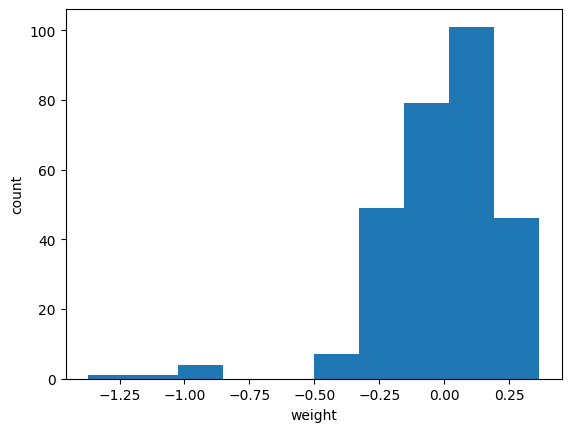

In [12]:
# 가중치의 분포 확인하기
## 나중에 이 값을 훈련하기 전의 가중치와 비교하기 위함

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

0을 중심으로 종 모양 분포를 띠고 있다

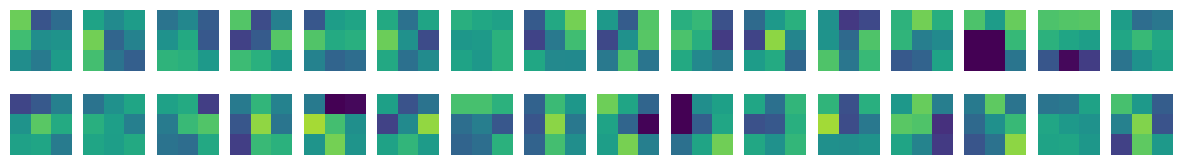

In [13]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

가중치 값이 무작위로 나열된 것이 아닌 **어떤 패턴을 볼 수 있음**

첫 번째 줄의 맨 외쪽 가중치는 오른쪽 3픽셀의 갚이 높다 (밝은 부분의 값이 높다).
이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화된다.

`imshow()` 함수는 배열의 max/min값을 사용해 픽셀의 강도를 표현

배열의 최댓값 -> 가장 밝은 노란색

In [14]:
# 훈련하지 않은 빈 합성곱 신경망 만들기

no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

# 앞서 그래프로 출력한 가중치와 같음. 동일하게 (3,3) 커널인 필터를 32개 사용했으므

(3, 3, 1, 32)


In [16]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0053191613 0.08463709


평균은 이전처럼 0에 가깝지만, 이전과 달리 표준편차가 매우 작아짐

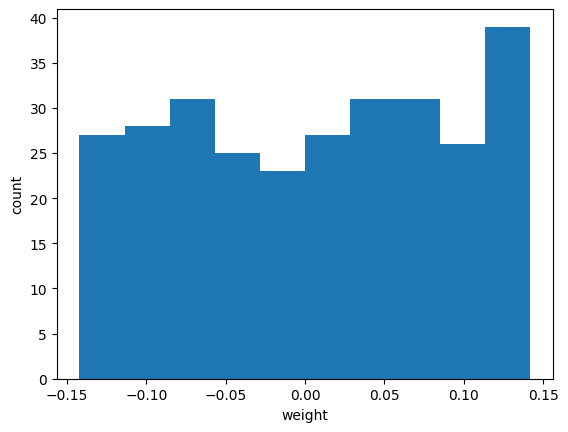

In [17]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

대부분의 가중치가 -0.15와 0.15 사이에 있고 비교적 고른 분포를 보임

-> 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등분포(uniform dist) 에서 랜덤하게 값을 선택하기 때문이다.


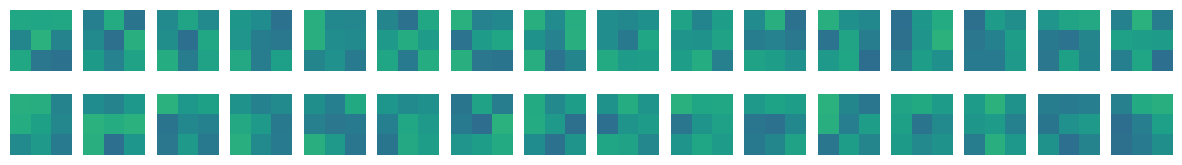

In [18]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

전체적으로 가중치가 밋밋하게 초기화됨.

이그림을 훈련이 끝난 이전 가중치와 비교해보면, 합성곱 신경망이 mnist 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실을 알 수 있다.

😧 합성곱 신경망의 학습을 시각화하는 두번째 방법

->> 합성곱 층에서 출력된 특성 맵 그려보기

## 함수형 API

- 딥러닝처럼 복잡한 모델을 사용할 때, 입력이 2개일 수도 있고 출력이 2개일 수도 있는 등의 상황에서
- Sequential 클래스는 사용하기가 어려워서 `함수형 api` 사용
- 케라스의 model 클래스를 사용하여 만듬

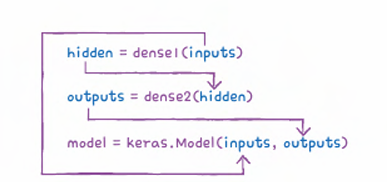

1. desne 층 객체를 2개 만든다.
2. 이 객체를 함수처럼 호출한다 `hidden = dense1(inputs)`
3. 첫 번째 층의 출력인 hidden을 두번째 층의 입력으로 사용하여 호출 `outputs = dense2(hidden)`
4. inputs와 outputs를 model 클래스로 연결

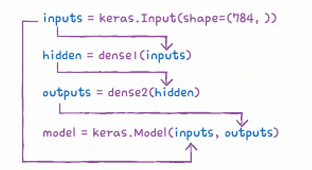

`inputs` 는 어디서 왔을까?
-> plot_model() 함수로 모델을 도식화할 때 inputlayer 클래스가 맨 처음 나왔을 때, 바로 inputs가 inputlayer 클래스의 출력값이 되어야한다.

`inputs = keras.Input(shape=(784,))` 로 인풋레이어 클래스 객체를 만들어 출력 반환해주기

In [19]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


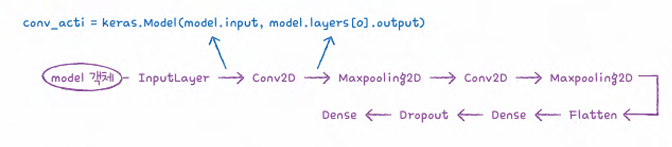

그런데 가끔은 전체 모델의 최종 출력이 아니라,
중간에 있는 어떤 층의 출력값이 필요할 때가 있어!
(예: 첫 번째 Conv2D 층의 결과만 보고 싶을 때)

💡 그럴 땐 어떻게 하냐면?
바로 새로운 모델을 만들어서 원하는 중간 층까지만 출력하게 만들어!


`model.input`: 원래 모델의 입력

`model.layers[0].output`: 모델의 첫 번째 층(Conv2D)의 출력

👉 즉, "입력 넣으면 첫 번째 Conv2D까지만 계산해서 출력해주는 새 모델"을 만든 거야!

In [21]:
conv_acti = keras.Model(model.inputs, model.layers[0].output) #케라스(Keras) 모델에서 중간 층의 출력값을 뽑아내는 방법

## 특성 맵 시각화

훈련 세트에 있는 첫번째 샘플 그려보기

In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


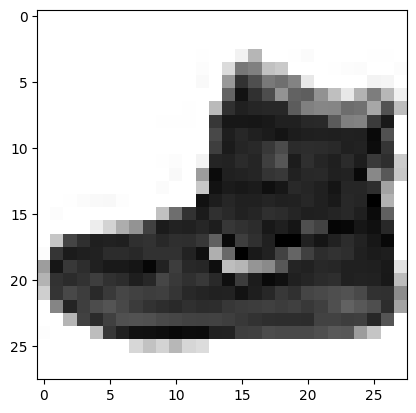

In [23]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

앵클 부츠인 이 샘플을 `conv_acti` 모델에 주입하여 Conv2D 층이 만드는 특성 맵 출력하기

In [24]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0 # 슬라이싱 연산자를 사용해 첫번째 샘플 선택하고 (784,)크기를 (28,28,1)로 변경하고 나누기 255

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


In [25]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩과 32개 필터 사용한 합성곱 층 출력이므로 (28,28,32)인데
첫번째 차원은 배치 차원이므로, 샘플을 하나 입력했기 때문에 1이 됨

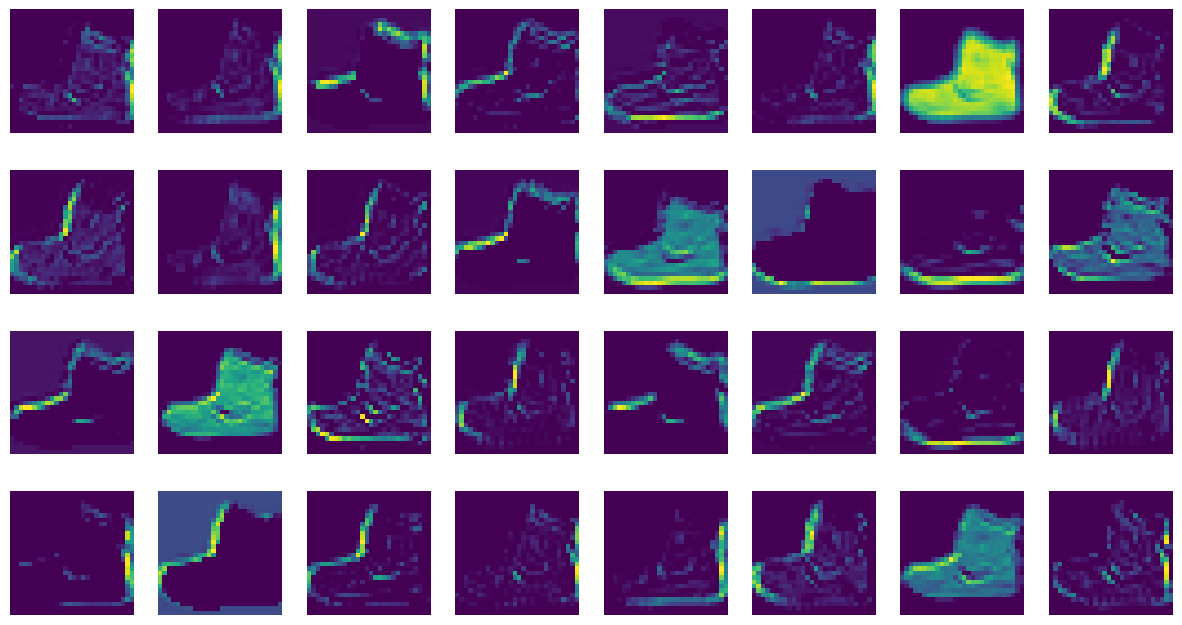

In [26]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

이 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다.

앞서 32개 필터의 가중치를 출력한 그림과 몇 개를 비교해 보면, 비슷한 특성을 띠는 것을 알 수 있음!

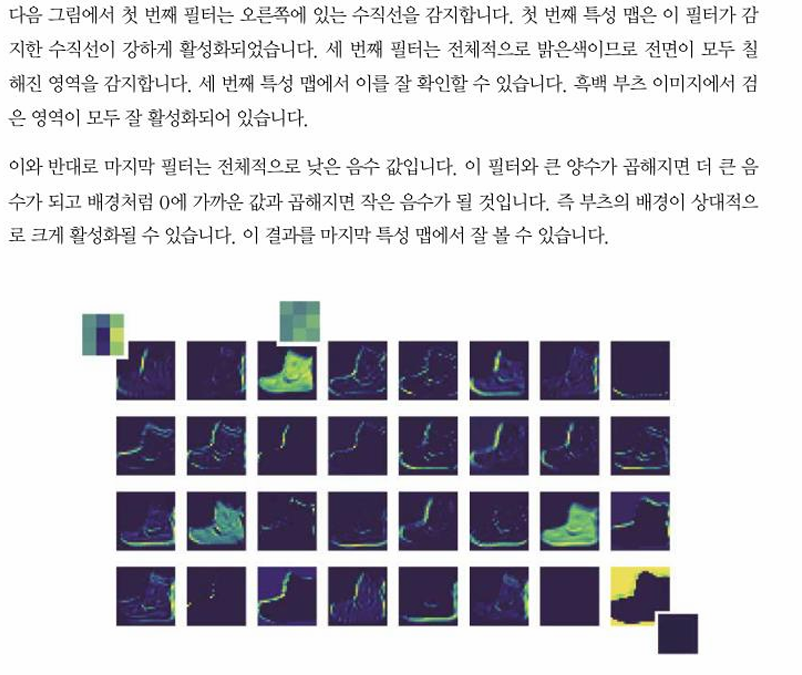

두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인 가능

In [27]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output) # model 객체의 입력과 두번째 합성곱 층인 model.layers[2] 출력을 연결

In [28]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [29]:
print(feature_maps.shape)

(1, 14, 14, 64)


첫번째 풀링 층에서 가로세로 크기가 절반으로 줄ㄹ었고
두번째 합성곱 층의 필터 개수는 64개 이므로 배치차원을 제외한 피처맵의 크기는 (14,14,64)

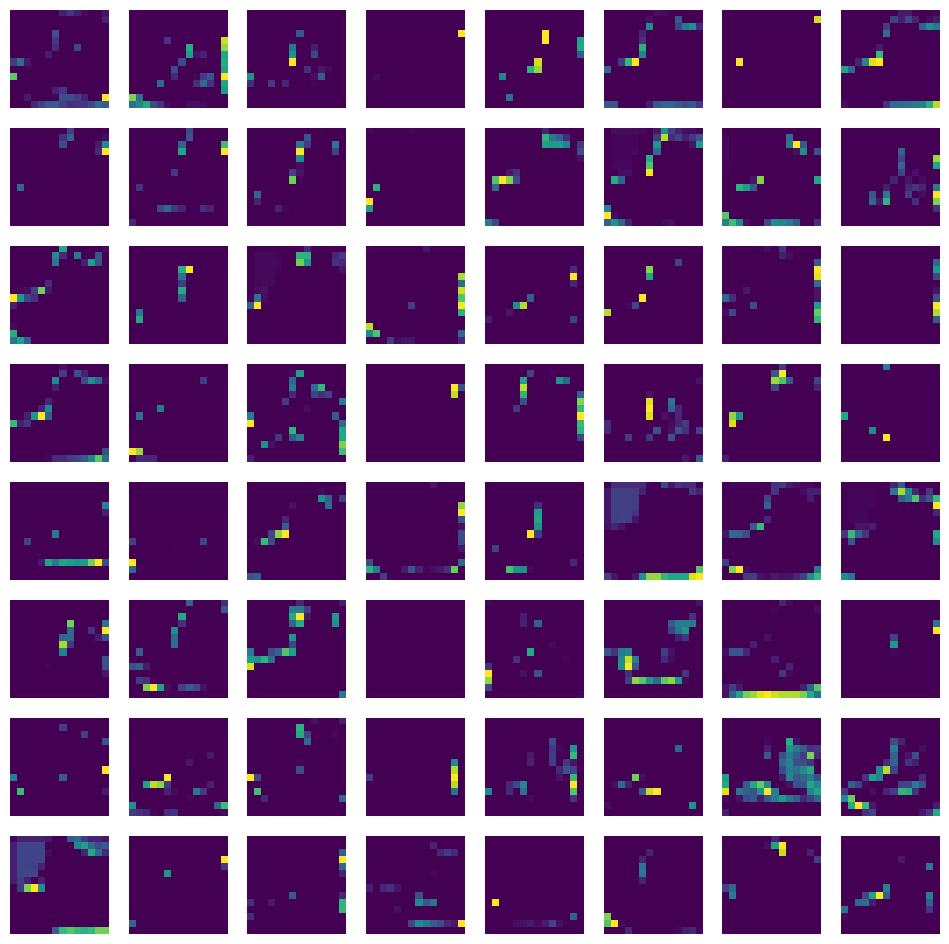

In [30]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

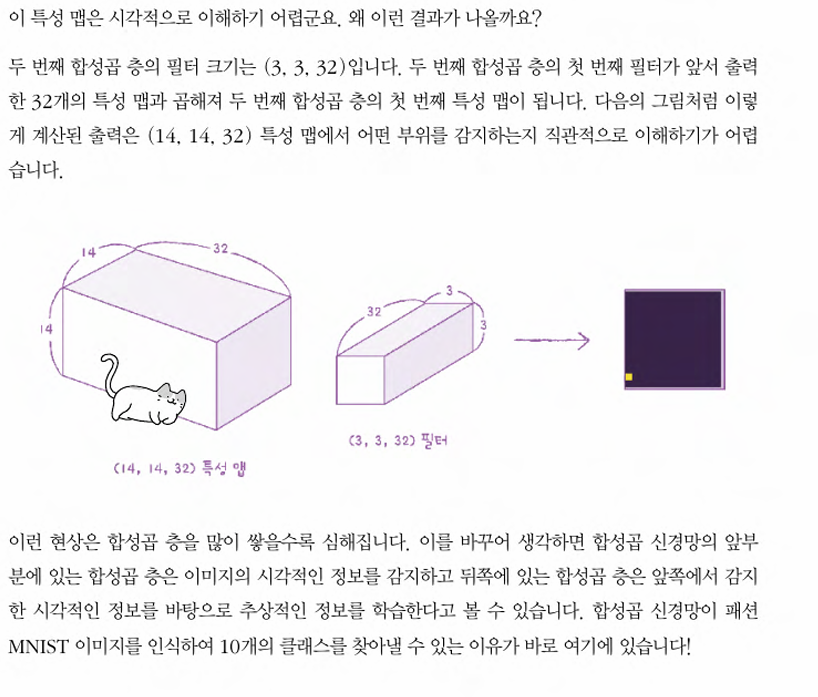

# 8-3 확인 문제

1. 답 2번,
- 합성곱(Convolution)은 비슷한 모양을 찾는 필터이므로, 파란 동그라미 필터가 학습되었다면, 동그라미가 많은 이미지에 강하게 반응

2.(어령ㅂ다) 함수형 모델은 `Model(inputs=..., outputs=...)` 이렇게 생겨야하는데, 4번의 경우 `model = Model()(uns,outs)` 로 Model()

→ 모델 객체를 만든다 (예: model = Model(...))
(..., ...) → 모델을 또 "함수처럼 호출"한다 ❌
→ 근데 Model 클래스는 이렇게 직접 호출될 수 없어! → 에러남


3. 4번도 틀리긴 했지만, 질문은 “입력(input)”에 대한 것이므로 입력을 잘못 참조한 3번이 정답